In [5]:
import pandas as pd


## 전처리 다시 
- 브랜드명 제외 
- 성분 정규화

In [6]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
상품명에서 브랜드명만 제거
성분은 그대로 유지
"""

import pandas as pd
import re

# ========================================
# 1. 데이터 로드
# ========================================

print("=" * 80)
print("브랜드명 제거 전처리")
print("=" * 80)

df = pd.read_csv('merged_products_final.csv')

print(f"\n전체 제품: {len(df)}개")
print(f"컬럼: {df.columns.tolist()}")

# ========================================
# 2. 브랜드명 제거 함수
# ========================================

def remove_brand_from_product_name(row):
    """
    상품명 앞에 브랜드명이 있으면 제거
    """
    brand = str(row['brand']).strip()
    product_name = str(row['product_name']).strip()
    
    if pd.isna(row['brand']) or pd.isna(row['product_name']):
        return product_name
    
    # 브랜드명이 상품명 앞에 있으면 제거
    # 1. 정확히 일치하는 경우
    if product_name.startswith(brand):
        cleaned = product_name[len(brand):].strip()
        return cleaned if cleaned else product_name
    
    # 2. 대소문자 구분 없이 일치하는 경우
    if product_name.lower().startswith(brand.lower()):
        cleaned = product_name[len(brand):].strip()
        return cleaned if cleaned else product_name
    
    # 3. 브랜드명 + 공백 여러개
    pattern = re.escape(brand) + r'\s+'
    cleaned = re.sub(pattern, '', product_name, count=1, flags=re.IGNORECASE)
    
    return cleaned.strip() if cleaned.strip() else product_name

# ========================================
# 3. 브랜드명 제거 적용
# ========================================

print("\n브랜드명 제거 중...")

df['product_name'] = df.apply(remove_brand_from_product_name, axis=1)

print("✅ 완료!")

# ========================================
# 4. 결과 확인
# ========================================

print("\n" + "=" * 80)
print("처리 결과 샘플 (무작위 10개)")
print("=" * 80)

# 원본 다시 로드
df_original = pd.read_csv('merged_products_final.csv')

sample_indices = df.sample(min(10, len(df))).index

for idx in sample_indices:
    original_row = df_original.loc[idx]
    cleaned_row = df.loc[idx]
    
    print(f"\n[{cleaned_row['product_id']}] {cleaned_row['brand']}")
    print(f"이전: {original_row['product_name']}")
    print(f"이후: {cleaned_row['product_name']}")
    print("-" * 80)

# ========================================
# 5. 변경된 상품명 통계
# ========================================

print("\n" + "=" * 80)
print("통계")
print("=" * 80)

# 상품명이 변경된 개수
changed = (df_original['product_name'] != df['product_name']).sum()
print(f"\n상품명이 변경된 제품: {changed}개 ({changed/len(df)*100:.1f}%)")
print(f"변경되지 않은 제품: {len(df) - changed}개 ({(len(df)-changed)/len(df)*100:.1f}%)")

# ========================================
# 6. 저장
# ========================================

output_path = 'products_brand_removed.csv'
df.to_csv(output_path, index=False, encoding='utf-8-sig')

print(f"\n✅ 저장 완료!")
print(f"저장 경로: {output_path}")
print(f"총 {len(df)}개 제품")

# ========================================
# 7. 변경된 제품 목록 저장
# ========================================

if changed > 0:
    changed_products = df_original[df_original['product_name'] != df['product_name']].copy()
    changed_products['original_name'] = df_original.loc[changed_products.index, 'product_name']
    changed_products['new_name'] = df.loc[changed_products.index, 'product_name']
    
    changed_products[['product_id', 'brand', 'original_name', 'new_name']].to_csv(
        'brand_removal_changes.csv',
        index=False, encoding='utf-8-sig'
    )
    
    print(f"✅ 변경 내역 저장: brand_removal_changes.csv")

print("\n" + "🎉" * 40)
print("완료!")
print("🎉" * 40)

브랜드명 제거 전처리

전체 제품: 1252개
컬럼: ['product_id', 'category', 'brand', 'product_name', 'ingredient', 'product_rating']

브랜드명 제거 중...
✅ 완료!

처리 결과 샘플 (무작위 10개)

[E190] 더페이스샵
이전: 더페이스샵 올티밋 나이아신아마이드 10 세럼
이후: 올티밋 나이아신아마이드 10 세럼
--------------------------------------------------------------------------------

[L1] 온그리디언츠
이전: 온그리디언츠 스킨 베리어 카밍 로션 이엑스
이후: 스킨 베리어 카밍 로션 이엑스
--------------------------------------------------------------------------------

[C592] SVR
이전: SVR 바이오틱 C20 크림
이후: 바이오틱 C20 크림
--------------------------------------------------------------------------------

[C646] 생블랑쉬
이전: 생블랑쉬 바이탈부스트크림
이후: 바이탈부스트크림
--------------------------------------------------------------------------------

[C297] 파티온
이전: 파티온 노스카나인 트러블 모공탄력 크림
이후: 노스카나인 트러블 모공탄력 크림
--------------------------------------------------------------------------------

[E255] 성분에디터
이전: 성분에디터 그린토마토 포어 리프팅 앰플 트리플
이후: 그린토마토 포어 리프팅 앰플 트리플
--------------------------------------------------------------------------------

[M15] 에스네이처

In [13]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
브랜드명이 상품명에 여전히 포함되어 있는지 확인
"""

import pandas as pd

# 데이터 로드
df = pd.read_csv('products_brand_removed.csv')

print("=" * 80)
print("브랜드명 포함 여부 확인")
print("=" * 80)

# 브랜드명이 상품명에 포함되어 있는지 확인
still_contains_brand = []

for idx, row in df.iterrows():
    brand = str(row['brand']).strip().lower()
    product_name = str(row['product_name']).strip().lower()
    
    if brand in product_name:
        still_contains_brand.append({
            'product_id': row['product_id'],
            'brand': row['brand'],
            'product_name': row['product_name'],
            'category': row['category']
        })

# 결과 출력
print(f"\n전체 제품: {len(df)}개")
print(f"브랜드명이 포함된 제품: {len(still_contains_brand)}개 ({len(still_contains_brand)/len(df)*100:.1f}%)")

if len(still_contains_brand) > 0:
    print(f"\n브랜드명이 여전히 포함된 제품 목록:")
    print("-" * 80)
    
    result_df = pd.DataFrame(still_contains_brand)
    
    # 처음 20개만 출력
    for idx, row in result_df.head(20).iterrows():
        print(f"\n{row['product_id']} | {row['brand']} | {row['category']}")
        print(f"상품명: {row['product_name']}")
    
    if len(still_contains_brand) > 20:
        print(f"\n... 외 {len(still_contains_brand) - 20}개 더")
    
    # CSV로 저장
    result_df.to_csv('products_still_has_brand.csv', 
                     index=False, encoding='utf-8-sig')
    print(f"\n✅ 전체 목록 저장: products_still_has_brand.csv")
    
    # 브랜드별 통계
    print("\n" + "=" * 80)
    print("브랜드별 통계")
    print("=" * 80)
    brand_counts = result_df['brand'].value_counts().head(10)
    print(brand_counts)
    
else:
    print("\n✅ 모든 상품명에서 브랜드명이 제거되었습니다!")

print("\n완료!")

브랜드명 포함 여부 확인

전체 제품: 1252개
브랜드명이 포함된 제품: 1개 (0.1%)

브랜드명이 여전히 포함된 제품 목록:
--------------------------------------------------------------------------------

C448 | 조선미녀 | 크림
상품명: 조선미녀크림

✅ 전체 목록 저장: products_still_has_brand.csv

브랜드별 통계
brand
조선미녀    1
Name: count, dtype: int64

완료!


In [18]:
df = pd.read_csv("products_brand_removed.csv")
df.head(30)

,product_id,category,brand,product_name,ingredient,product_rating
0,S1,스킨/토너,아누아,어성초 77 히알루론 수분 진정 토너 더블,"약모밀꽃/잎/줄기수(77%), 정제수, 1,2-헥산다이올, 글리세린, 글리세레스-2...",4.8
1,S200,스킨/토너,피지오겔,DMT 포맨 에센셜 토너,"정제수, 다이프로필렌글라이콜, 글리세린, 1,2-헥산다이올, 펜타에리스리틸테트라에틸...",4.9
2,S201,스킨/토너,달팡,인트랄 데일리 미셀러 토너,"정제수,글리세레스-26,부틸렌글라이콜,비스-피이지-18메틸에터다이메틸실레인,노니열매...",4.7
3,S202,스킨/토너,닥터지,에이클리어 밸런싱 토너,"정제수, 펜틸렌글라이콜, 프로판다이올, 1,2-헥산다이올, 글리세레스-26, 에톡시...",4.8
4,S203,스킨/토너,비오템,비오수르스 중복합성 토너,정제수 부틸렌글라이콜 변성알코올 글리세린 피피지-6-데실테트라데세스-30 피이지/피...,5.0
5,S205,스킨/토너,닥터하스킨,미라클아토 하이드로 토너,"정제수,라벤더꽃수,부틸렌글라이콜,1,2-헥산다이올,글리세린,소듐아크릴릭애씨드/엠에이...",4.9
6,S206,스킨/토너,트러블레스,마일드 클리어 토너 에센스,"정제수, 다이프로필렌글라이콜, 메틸프로판다이올, 글리세린, 티트리잎수, 판테놀, 글...",5.0
7,S207,스킨/토너,프랭클리,시카 80 히알루론산 토너,"병풀추출물(80%), 정제수, 1,2-헥산다이올, 메틸프로판다이올, 베타인, 소듐하...",4.8
8,S208,스킨/토너,헤라,옴므 파워부스팅 토너,"정제수, 변성알코올, 부틸렌글라이콜, 글리세린, 나이아신아마이드, 비스-피이지-18...",5.0
9,S209,스킨/토너,크리니크,모이스춰 써지 하이드로 인퓨즈드 로션,"정제수,비스-피이지-18메틸에터다이메틸실레인,글리세린,부틸렌글라이콜,펜틸렌글라이콜,...",4.8


In [44]:
df['brand'].unique().tolist()

['아누아',
 '피지오겔',
 '달팡',
 '닥터지',
 '비오템',
 '닥터하스킨',
 '트러블레스',
 '프랭클리',
 '헤라',
 '크리니크',
 '센텔리안24',
 '나인위시스',
 '에스테덤',
 '에스티로더',
 '라끄베르',
 '프리메라',
 '아떼',
 '조선미녀',
 '디마르3',
 '후시다인',
 '아이소이',
 '닥터멜락신',
 '비레디',
 '더랩바이블랑두',
 '헤브블루',
 '플라스킨',
 '리얼베리어',
 '더후',
 '미구하라',
 '클럽맨피노드',
 '셀린저',
 '시카고',
 '썸바이미',
 '엠브리올리스',
 '싸이닉',
 '디오디너리',
 '닥터자르트',
 '잇츠스킨',
 '폴라초이스',
 '플리프',
 '그레이멜린',
 '유세린',
 '라네즈',
 '라빠레뜨 뷰티',
 '비욘드',
 '더마펌',
 '아크네스',
 '메디큐브',
 '스콧해미쉬',
 '아이오페',
 'LBB',
 '스킨앤랩',
 '플로디카',
 'VT',
 '피캄',
 '넘버즈인',
 '아벤느',
 '바이오더마',
 '마녀공장',
 '아크웰',
 '라로슈포제',
 '원씽',
 '헤이네이처',
 '마몽드',
 '글로오아시스',
 '코스톡',
 '이니스프리',
 '정샘물',
 '디퍼',
 '차앤박',
 '헉슬리',
 '아이디얼포맨',
 '우노',
 '티엘스',
 '피토메르',
 '달바',
 '믹순',
 '셀리맥스',
 '더마라인',
 '반코르',
 '바이오던스',
 '키엘',
 '케어놀로지',
 '포레스트',
 '파파레서피',
 '브링그린',
 '눅스',
 '에르쯔틴',
 '유리아쥬',
 '웰라쥬',
 '스킨푸드',
 '리엔케이',
 '브이앤에이뷰티',
 '브리올옴므',
 '어나더페이스',
 '제로이드',
 '설화수',
 '에스트라',
 '코스알엑스',
 '한율',
 '랩시리즈',
 '라운드랩',
 '메이크프렘',
 '이즈앤트리',
 '에뛰드',
 '식물나라',
 '코스노리',
 '파티온',
 '토리든',
 '엠도씨',
 '에스네이처',
 '구달',
 '아비브'

전체 제품 수: 1252
총 성분-제품 관계: 53,968개
고유 성분 개수: 4,777개

=== 기본 통계 ===
고유 성분: 4,777개
제품당 평균 성분: 43.11개
제품당 중앙값: 39개
최소: 1개
최대: 397개

=== Top 50 성분 ===
 1. 글리세린                                     1166회 ( 2.16%)
 2. 1                                        1109회 ( 2.05%)
 3. 정제수                                      1102회 ( 2.04%)
 4. 2-헥산다이올                                  1071회 ( 1.98%)
 5. 부틸렌글라이콜                                  1059회 ( 1.96%)
 6. 에틸헥실글리세린                                  820회 ( 1.52%)
 7. 소듐하이알루로네이트                                673회 ( 1.25%)
 8. 판테놀                                       606회 ( 1.12%)
 9. 프로판다이올                                    601회 ( 1.11%)
10. 나이아신아마이드                                  575회 ( 1.07%)
11. 토코페롤                                      573회 ( 1.06%)
12. 아데노신                                      570회 ( 1.06%)
13. 다이소듐이디티에이                                 569회 ( 1.05%)
14. 하이드로제네이티드레시틴                              569회 ( 1.05%)
15. 트로메타민     

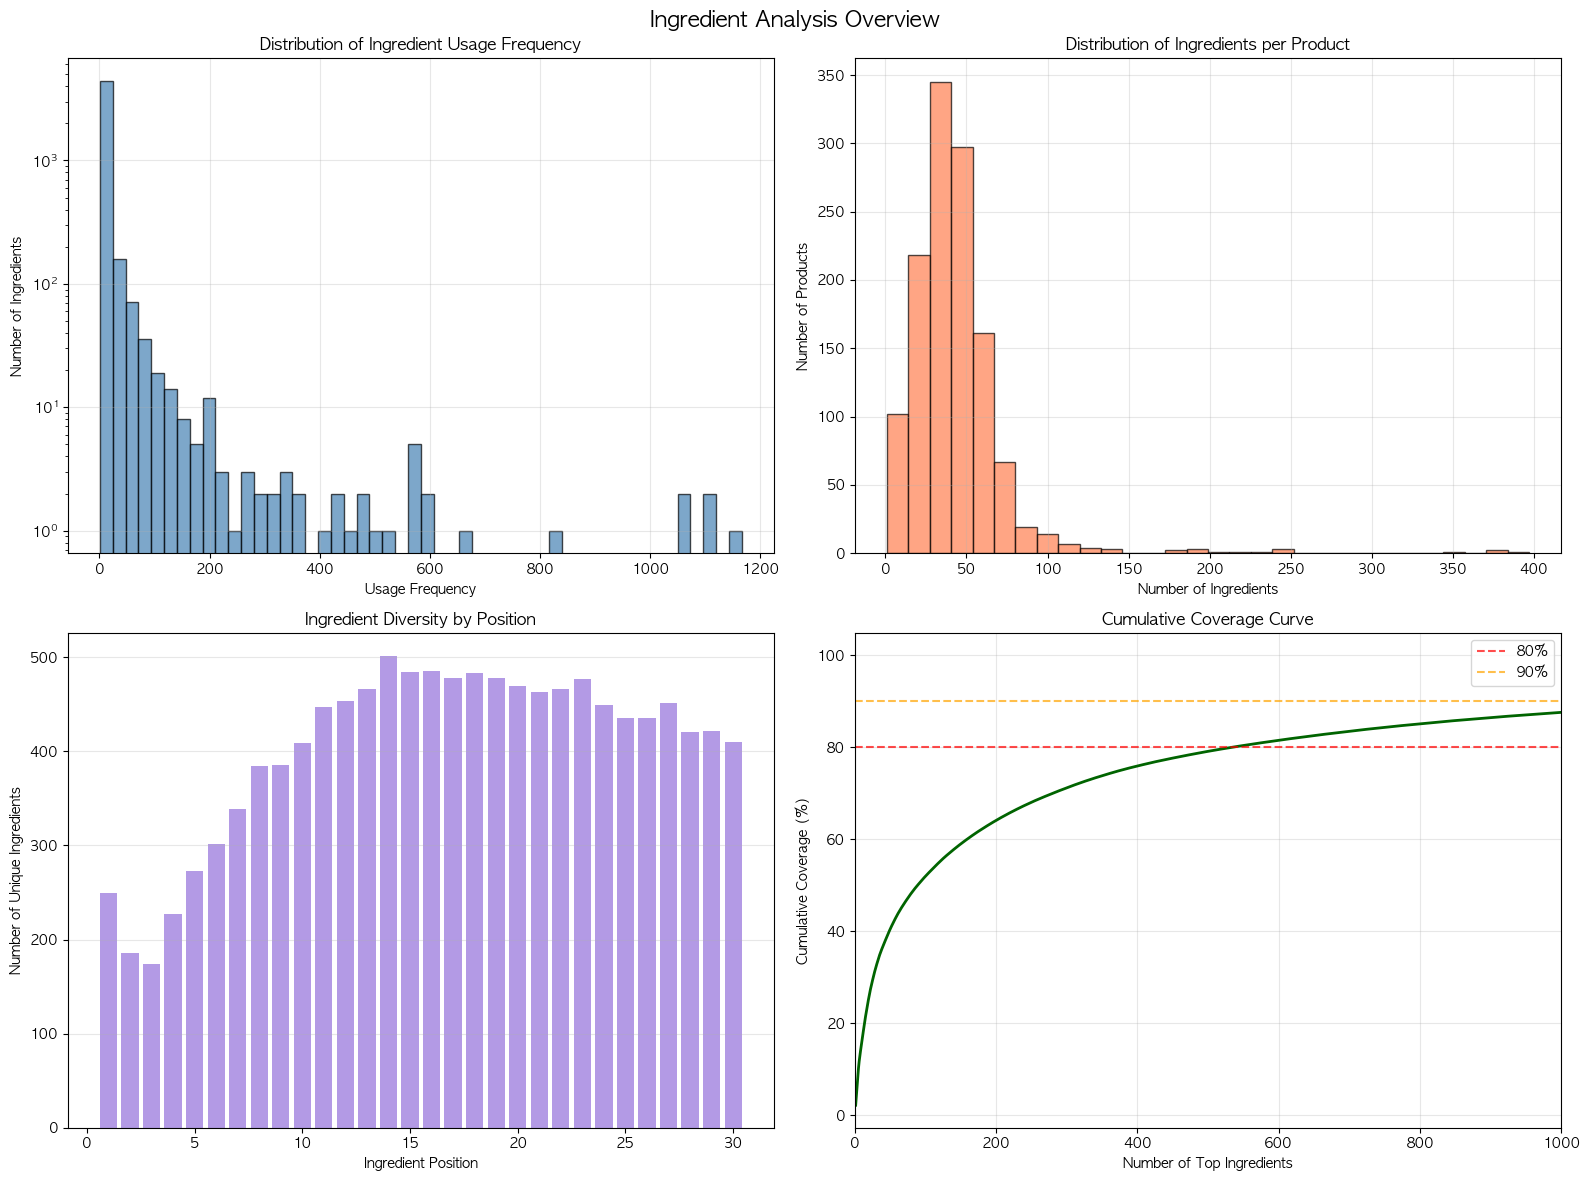

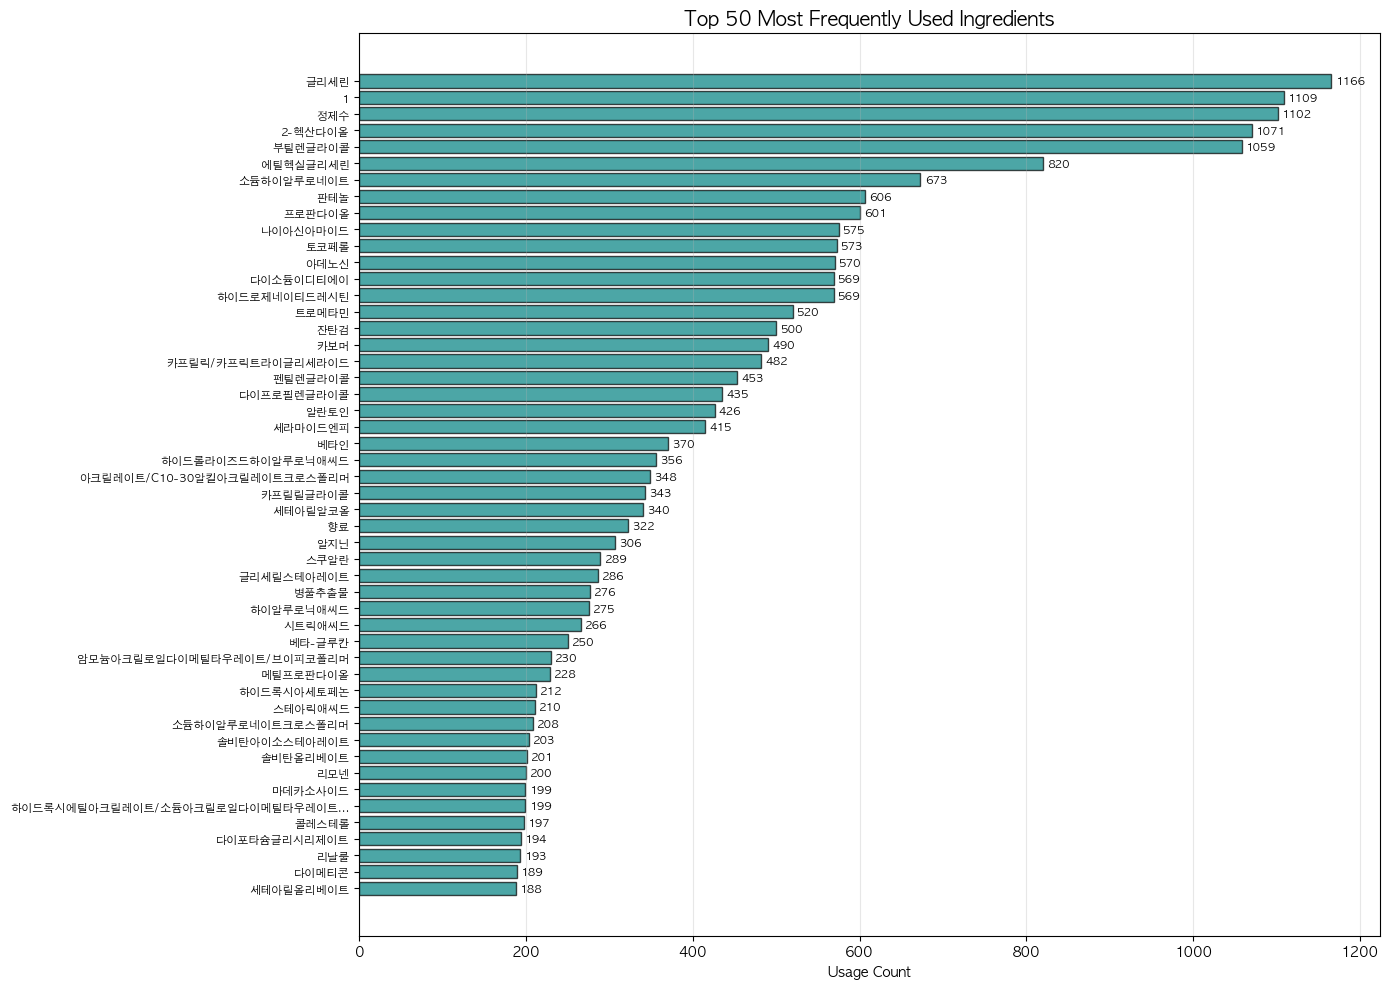

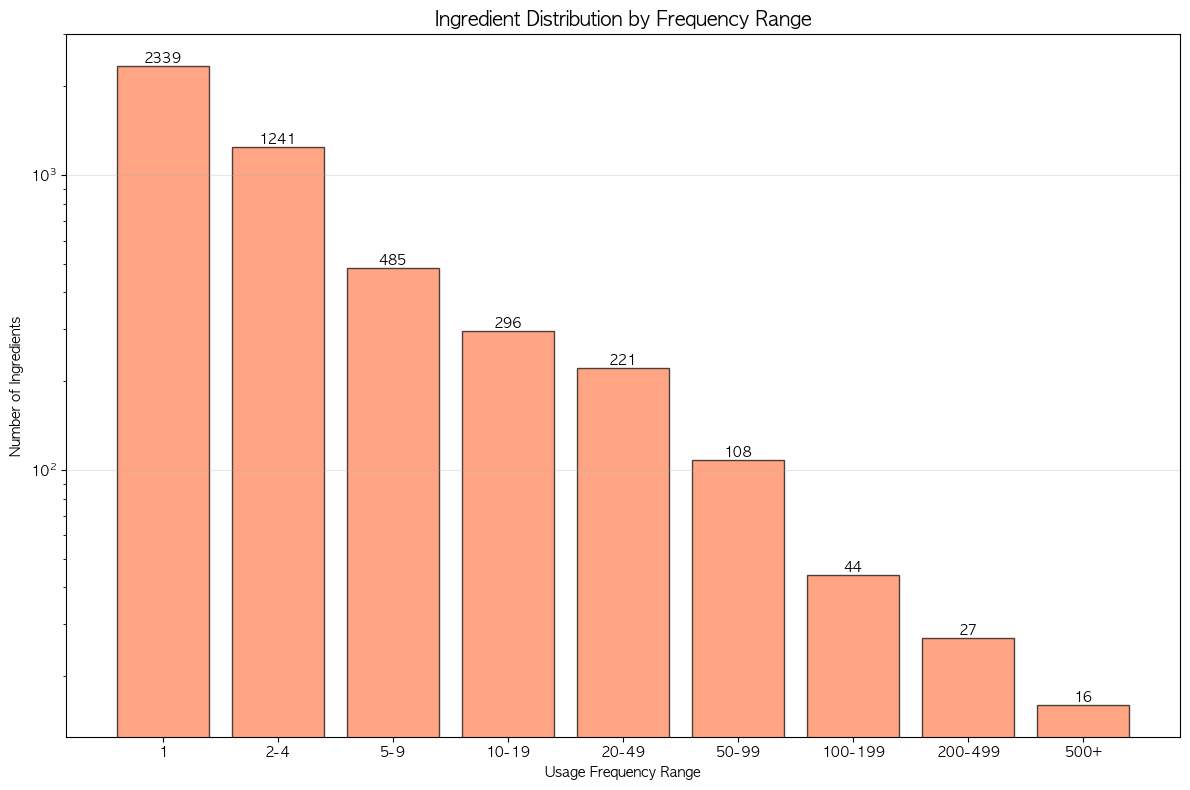


=== Top-N 필터링 옵션 비교 ===
Top-N      커버리지         제품 커버율          엣지 수        
------------------------------------------------------------
100          52.0%        96.1%           28,053
200          64.1%        96.1%           34,598
300          71.2%        96.1%           38,420
500          79.1%        96.1%           42,700
1000         87.6%        96.2%           47,272

=== Top-500 성분 선택 ===
성분 노드: 500개
Product-Ingredient 엣지: 42700개

✅ 완료!


In [8]:
# ========================================
# 성분 빈도 분석 및 시각화
# Jupyter 노트북에서 셀 단위로 실행
# ========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# 한글 폰트 설정 (환경에 맞게 주석 해제)
# Windows
# plt.rcParams['font.family'] = 'Malgun Gothic'
# Mac
plt.rcParams['font.family'] = 'AppleGothic'
# Linux/기본
#plt.rcParams['font.family'] = 'DejaVu Sans'
#plt.rcParams['axes.unicode_minus'] = False

# ========================================
# 1. 성분 파싱
# ========================================

# 이미 df가 로드되어 있다고 가정
# df = pd.read_csv("products_brand_removed.csv")

print(f"전체 제품 수: {len(df)}")

# 성분을 개별 행으로 분리
ingredients_list = []

for idx, row in df.iterrows():
    if pd.notna(row['ingredient']):
        ingredient_str = str(row['ingredient'])
        ingredients = [ing.strip() for ing in ingredient_str.split(',')]
        
        for position, ing in enumerate(ingredients):
            if ing:
                ingredients_list.append({
                    'product_id': row['product_id'],
                    'ingredient_name': ing,
                    'position': position + 1
                })

product_ingredient_df = pd.DataFrame(ingredients_list)

print(f"총 성분-제품 관계: {len(product_ingredient_df):,}개")
print(f"고유 성분 개수: {product_ingredient_df['ingredient_name'].nunique():,}개")

# ========================================
# 2. 성분 빈도 계산
# ========================================

ingredient_counts = product_ingredient_df['ingredient_name'].value_counts()
ingredients_per_product = product_ingredient_df.groupby('product_id').size()

print(f"\n=== 기본 통계 ===")
print(f"고유 성분: {len(ingredient_counts):,}개")
print(f"제품당 평균 성분: {ingredients_per_product.mean():.2f}개")
print(f"제품당 중앙값: {ingredients_per_product.median():.0f}개")
print(f"최소: {ingredients_per_product.min()}개")
print(f"최대: {ingredients_per_product.max()}개")

# ========================================
# 3. Top-50 성분
# ========================================

print(f"\n=== Top 50 성분 ===")
top_50 = ingredient_counts.head(50)
for rank, (ing, count) in enumerate(top_50.items(), 1):
    pct = (count / ingredient_counts.sum()) * 100
    print(f"{rank:2d}. {ing:40s} {count:4d}회 ({pct:5.2f}%)")

# ========================================
# 4. 누적 커버리지
# ========================================

print(f"\n=== 누적 커버리지 ===")
total = ingredient_counts.sum()
for n in [10, 20, 50, 100, 200, 500, 1000]:
    if n <= len(ingredient_counts):
        coverage = (ingredient_counts.head(n).sum() / total) * 100
        print(f"Top {n:4d}: {coverage:6.2f}%")

# ========================================
# 5. 시각화 1: 전체 개요
# ========================================

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Ingredient Analysis Overview', fontsize=16, fontweight='bold')

# 5-1. 성분 사용 빈도 분포
ax1 = axes[0, 0]
ax1.hist(ingredient_counts.values, bins=50, edgecolor='black', alpha=0.7, color='steelblue')
ax1.set_xlabel('Usage Frequency')
ax1.set_ylabel('Number of Ingredients')
ax1.set_title('Distribution of Ingredient Usage Frequency')
ax1.set_yscale('log')
ax1.grid(True, alpha=0.3)

# 5-2. 제품당 성분 개수
ax2 = axes[0, 1]
ax2.hist(ingredients_per_product.values, bins=30, edgecolor='black', alpha=0.7, color='coral')
ax2.set_xlabel('Number of Ingredients')
ax2.set_ylabel('Number of Products')
ax2.set_title('Distribution of Ingredients per Product')
ax2.grid(True, alpha=0.3)

# 5-3. 성분 위치별 다양성
ax3 = axes[1, 0]
position_diversity = product_ingredient_df.groupby('position')['ingredient_name'].nunique()
position_diversity = position_diversity[position_diversity.index <= 30]
ax3.bar(position_diversity.index, position_diversity.values, color='mediumpurple', alpha=0.7)
ax3.set_xlabel('Ingredient Position')
ax3.set_ylabel('Number of Unique Ingredients')
ax3.set_title('Ingredient Diversity by Position')
ax3.grid(True, alpha=0.3, axis='y')

# 5-4. 누적 커버리지 곡선
ax4 = axes[1, 1]
cumsum_pct = (ingredient_counts.cumsum() / ingredient_counts.sum()) * 100
ax4.plot(range(1, len(cumsum_pct)+1), cumsum_pct.values, linewidth=2, color='darkgreen')
ax4.axhline(y=80, color='red', linestyle='--', label='80%', alpha=0.7)
ax4.axhline(y=90, color='orange', linestyle='--', label='90%', alpha=0.7)
ax4.set_xlabel('Number of Top Ingredients')
ax4.set_ylabel('Cumulative Coverage (%)')
ax4.set_title('Cumulative Coverage Curve')
ax4.set_xlim(0, min(1000, len(cumsum_pct)))
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ========================================
# 6. 시각화 2: Top-50 성분 막대그래프
# ========================================

fig, ax = plt.subplots(figsize=(14, 10))
top_50 = ingredient_counts.head(50)

labels = [name[:30] + '...' if len(name) > 30 else name for name in top_50.index]
bars = ax.barh(range(len(top_50)), top_50.values, color='teal', alpha=0.7, edgecolor='black')
ax.set_yticks(range(len(top_50)))
ax.set_yticklabels(labels, fontsize=8)
ax.set_xlabel('Usage Count')
ax.set_title('Top 50 Most Frequently Used Ingredients', fontsize=14, fontweight='bold')
ax.invert_yaxis()
ax.grid(True, alpha=0.3, axis='x')

for i, (bar, value) in enumerate(zip(bars, top_50.values)):
    ax.text(value + 5, i, str(value), va='center', fontsize=8)

plt.tight_layout()
plt.show()

# ========================================
# 7. 시각화 3: 빈도수 구간별 분포
# ========================================

fig, ax = plt.subplots(figsize=(12, 8))

bins = [1, 2, 5, 10, 20, 50, 100, 200, 500, ingredient_counts.max() + 1]
labels_bins = ['1', '2-4', '5-9', '10-19', '20-49', '50-99', '100-199', '200-499', '500+']

hist_data = pd.cut(ingredient_counts.values, bins=bins, labels=labels_bins, right=False)
hist_counts = hist_data.value_counts().sort_index()

bars = ax.bar(range(len(hist_counts)), hist_counts.values, color='coral', alpha=0.7, edgecolor='black')
ax.set_xticks(range(len(hist_counts)))
ax.set_xticklabels(hist_counts.index)
ax.set_xlabel('Usage Frequency Range')
ax.set_ylabel('Number of Ingredients')
ax.set_title('Ingredient Distribution by Frequency Range', fontsize=14, fontweight='bold')
ax.set_yscale('log')
ax.grid(True, alpha=0.3, axis='y')

for bar, value in zip(bars, hist_counts.values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height, f'{value}', 
            ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# ========================================
# 8. Top-N 필터링 옵션 비교
# ========================================

print(f"\n=== Top-N 필터링 옵션 비교 ===")
print(f"{'Top-N':<10} {'커버리지':<12} {'제품 커버율':<15} {'엣지 수':<12}")
print("-" * 60)

original_edges = len(product_ingredient_df)
original_products = product_ingredient_df['product_id'].nunique()

for n in [100, 200, 300, 500, 1000]:
    top_ingredients = ingredient_counts.head(n).index.tolist()
    filtered_df = product_ingredient_df[
        product_ingredient_df['ingredient_name'].isin(top_ingredients)
    ]
    
    coverage = (ingredient_counts.head(n).sum() / ingredient_counts.sum()) * 100
    product_coverage = (filtered_df['product_id'].nunique() / original_products) * 100
    edges = len(filtered_df)
    
    print(f"{n:<10} {coverage:>6.1f}%      {product_coverage:>6.1f}%         {edges:>8,}")

# ========================================
# 9. 결과를 DataFrame으로 저장 (선택사항)
# ========================================

# Top-500 성분으로 그래프 데이터 생성
TOP_N = 500

print(f"\n=== Top-{TOP_N} 성분 선택 ===")
top_ingredients = ingredient_counts.head(TOP_N).index.tolist()
filtered_df = product_ingredient_df[
    product_ingredient_df['ingredient_name'].isin(top_ingredients)
].copy()

# 성분 노드 생성
ingredient_nodes = pd.DataFrame({
    'ingredient_id': range(len(top_ingredients)),
    'ingredient_name': top_ingredients
})
ingredient_nodes['usage_count'] = ingredient_nodes['ingredient_name'].map(
    filtered_df['ingredient_name'].value_counts()
)

# 엣지 생성
name_to_id = dict(zip(ingredient_nodes['ingredient_name'], 
                      ingredient_nodes['ingredient_id']))
edges_df = filtered_df.copy()
edges_df['ingredient_id'] = edges_df['ingredient_name'].map(name_to_id)
edges_df = edges_df[['product_id', 'ingredient_id', 'position']].copy()

print(f"성분 노드: {len(ingredient_nodes)}개")
print(f"Product-Ingredient 엣지: {len(edges_df)}개")

# CSV 저장 (선택사항)
# ingredient_nodes.to_csv('ingredient_nodes.csv', index=False, encoding='utf-8-sig')
# edges_df.to_csv('product_ingredient_edges.csv', index=False, encoding='utf-8-sig')

print(f"\n✅ 완료!")

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


# 2. 성분 문자열을 리스트로 변환 및 전체 성분 리스트 생성
# 괄호 안의 함량(77%) 등은 제거하는 것이 좋으나, 우선 기본 분리만 진행
all_ingredients = []
df['ingredient_list'] = df['ingredient'].fillna('').str.split(',')

for ingredients in df['ingredient_list']:
    # 공백 제거 및 정제
    clean_ingreds = [i.strip() for i in ingredients if i.strip()]
    all_ingredients.extend(clean_ingreds)

# 3. 빈도수 계산
ingredient_counts = Counter(all_ingredients)
ing_df = pd.DataFrame(ingredient_counts.items(), columns=['ingredient', 'count']).sort_values(by='count', ascending=False)

print(f"전체 고유 성분 수: {len(ing_df)}개")
print(ing_df.head(20)) # 상위 20개 출력


전체 고유 성분 수: 4777개
            ingredient  count
4                 글리세린   1166
2                    1   1109
1                  정제수   1102
3              2-헥산다이올   1071
45             부틸렌글라이콜   1059
10            에틸헥실글리세린    820
18          소듐하이알루로네이트    673
15                 판테놀    606
68              프로판다이올    601
115           나이아신아마이드    575
110               토코페롤    573
119               아데노신    570
64           다이소듐이디티에이    569
89        하이드로제네이티드레시틴    569
14               트로메타민    520
219                잔탄검    500
118                카보머    490
35   카프릴릭/카프릭트라이글리세라이드    482
7              펜틸렌글라이콜    453
31          다이프로필렌글라이콜    435


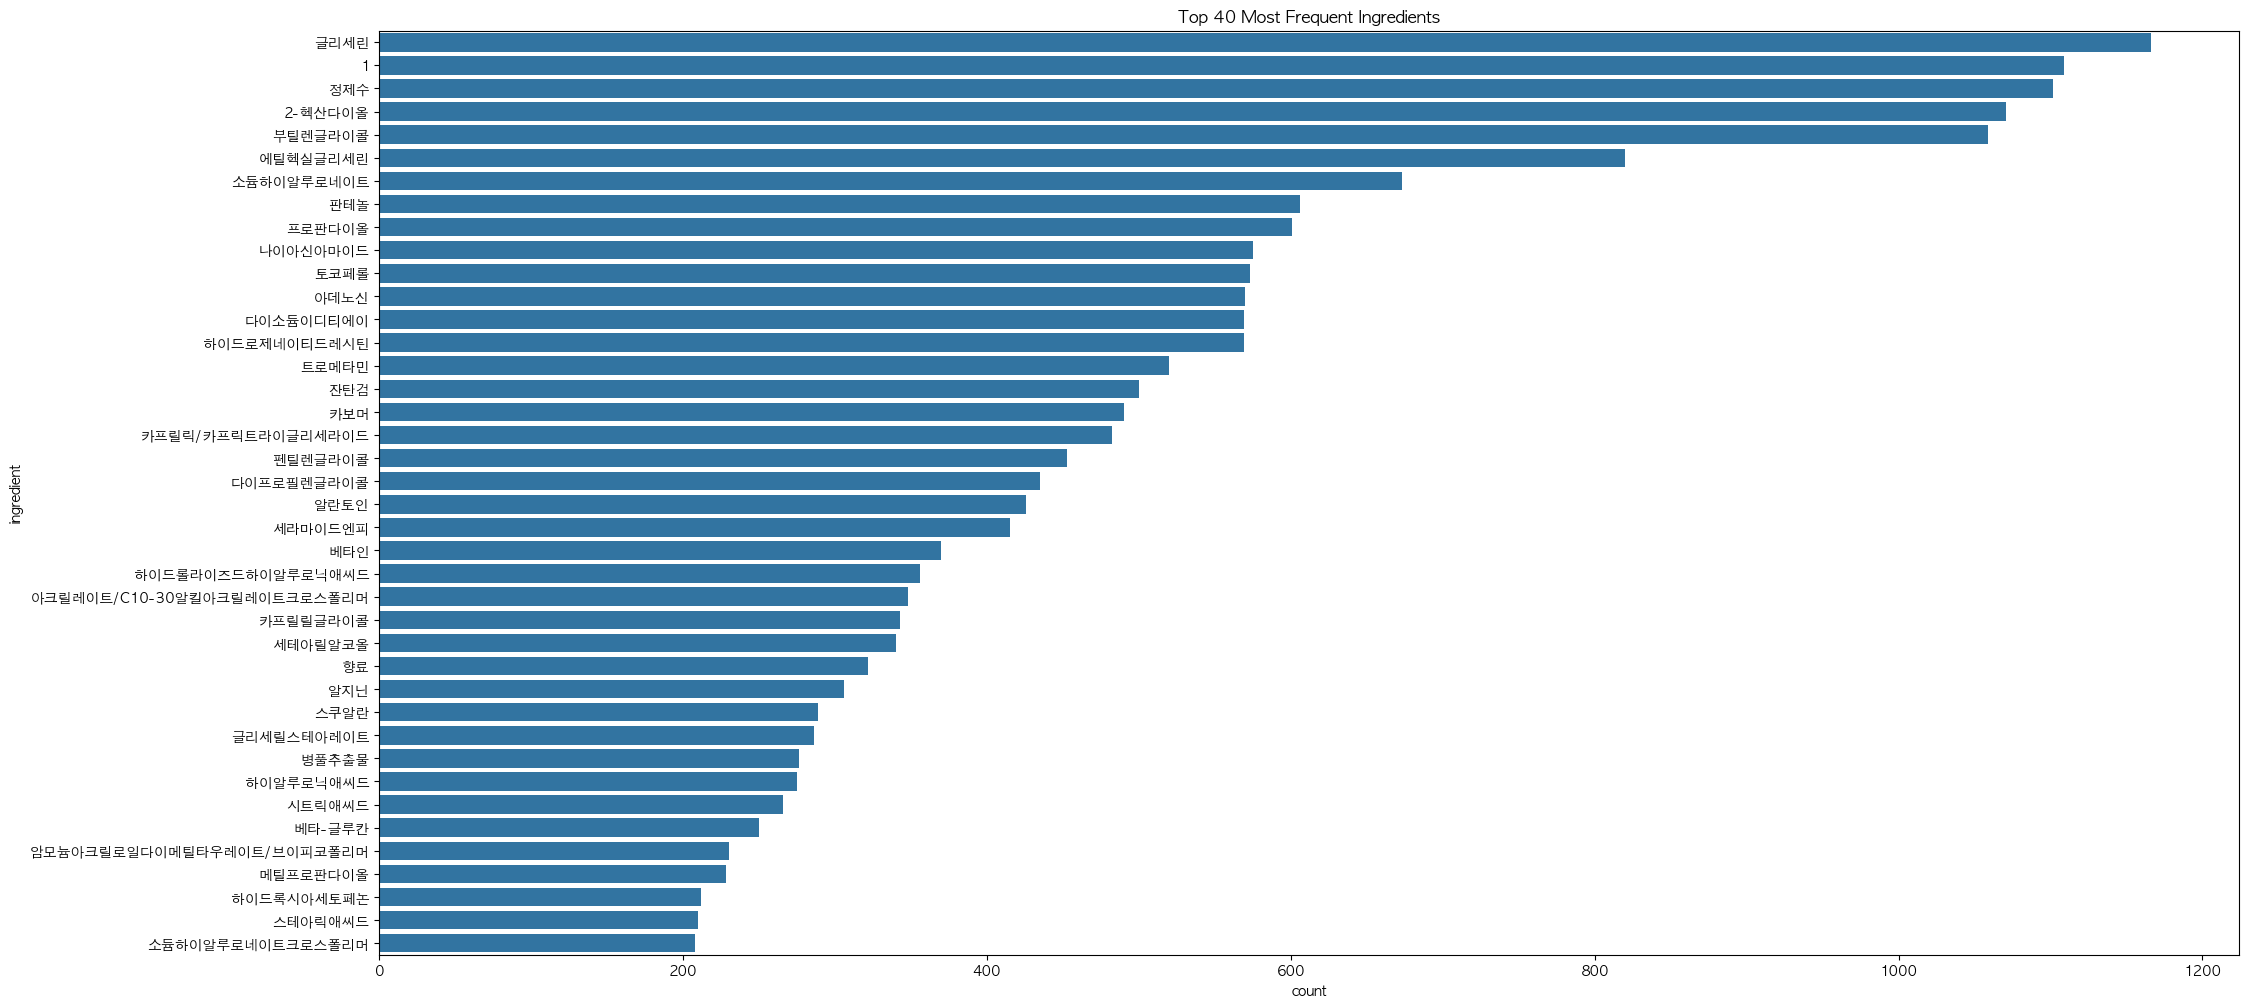

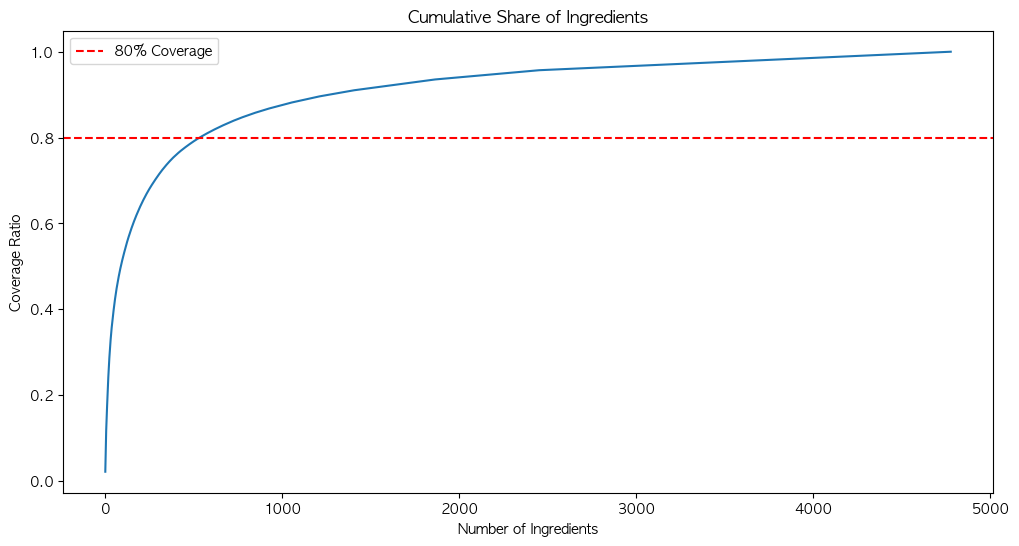

In [10]:
# 4. 시각화: 상위 성분 빈도수
plt.figure(figsize=(24,12))
sns.barplot(x='count', y='ingredient', data=ing_df.head(40))
plt.title('Top 40 Most Frequent Ingredients')
plt.show()

# 5. 누적 빈도 비율 확인 (Long-tail 분포 확인)
ing_df['cumulative_share'] = ing_df['count'].cumsum() / ing_df['count'].sum()
plt.figure(figsize=(12, 6))
plt.plot(range(len(ing_df)), ing_df['cumulative_share'])
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Coverage')
plt.title('Cumulative Share of Ingredients')
plt.xlabel('Number of Ingredients')
plt.ylabel('Coverage Ratio')
plt.legend()
plt.show()

In [11]:
# 1. 빈도별 성분 개수 집계 (에러 방지용 name 지정)
# ing_df['count']의 값(등장 횟수)들이 몇 번 반복되는지 셉니다.
appearance_counts = ing_df['count'].value_counts().sort_index()

# 2. 데이터프레임으로 변환하며 컬럼명 정리
appearance_stats = appearance_counts.reset_index(name='성분_개수')
appearance_stats.columns = ['등장_횟수(N)', '성분_개수']

# 3. 누적 정보 추가 (의사결정용)
appearance_stats['누적_성분_합계'] = appearance_stats['성분_개수'].cumsum()
appearance_stats['비중(%)'] = (appearance_stats['성분_개수'] / appearance_stats['성분_개수'].sum() * 100).round(2)

# 4. 전체 결과 출력 (중간 생략 없이 모두 보기)
import pandas as pd
with pd.option_context('display.max_rows', None):
    print("--- 각 등장 횟수별 성분 개수 전수 조사 ---")
    print(appearance_stats)

--- 각 등장 횟수별 성분 개수 전수 조사 ---
     등장_횟수(N)  성분_개수  누적_성분_합계  비중(%)
0           1   2339      2339  48.96
1           2    588      2927  12.31
2           3    457      3384   9.57
3           4    196      3580   4.10
4           5    156      3736   3.27
5           6    129      3865   2.70
6           7     78      3943   1.63
7           8     73      4016   1.53
8           9     49      4065   1.03
9          10     60      4125   1.26
10         11     49      4174   1.03
11         12     41      4215   0.86
12         13     31      4246   0.65
13         14     26      4272   0.54
14         15     20      4292   0.42
15         16     25      4317   0.52
16         17     23      4340   0.48
17         18     14      4354   0.29
18         19      7      4361   0.15
19         20     21      4382   0.44
20         21     10      4392   0.21
21         22      5      4397   0.10
22         23      9      4406   0.19
23         24      9      4415   0.19
24         25     14 

## 성분 기준 누적 분포 함수의 곡률이 변하는 변곡점(Elbow Point)을 계산하여 통계적으로 유의미한 빈도수를 설정

통계적으로 권장되는 Elbow Point (빈도수): 97


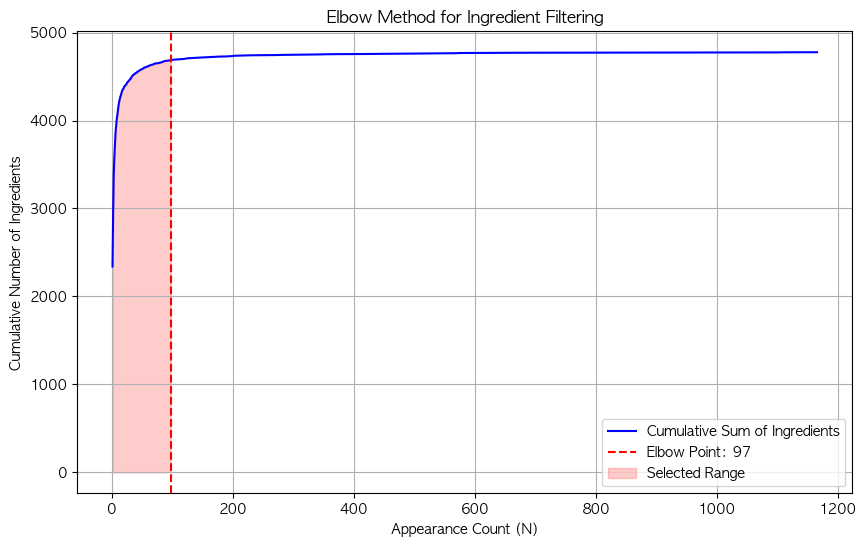

In [12]:
# 라이브러리 설치가 필요할 수 있습니다: !pip install kneed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 현재 노트북 커널 시스템에 직접 설치
import sys
!{sys.executable} -m pip install kneed

# 설치 후 바로 임포트 시도
from kneed import KneeLocator

# 1. 데이터 준비 (보내주신 빈도 통계 데이터 활용)
# appearance_stats 데이터프레임이 있다고 가정합니다.
# x축: 등장_횟수(N), y축: 해당 빈도까지의 누적 성분 개수
x = appearance_stats['등장_횟수(N)'].values
y = appearance_stats['누적_성분_합계'].values

# 2. KneeLocator를 이용한 엘보우 지점(Knee point) 찾기
# 곡선이 오목(concave)하므로 S자형 혹은 오목한 형태에 맞춰 설정
kneedle = KneeLocator(x, y, S=1.0, curve='concave', direction='increasing')
elbow_point = kneedle.knee

print(f"통계적으로 권장되는 Elbow Point (빈도수): {elbow_point}")

# 3. 시각화
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', label='Cumulative Sum of Ingredients')
plt.axvline(x=elbow_point, color='r', linestyle='--', label=f'Elbow Point: {elbow_point}')
plt.fill_between(x, y, where=(x <= elbow_point), color='red', alpha=0.2, label='Selected Range')

plt.title('Elbow Method for Ingredient Filtering')
plt.xlabel('Appearance Count (N)')
plt.ylabel('Cumulative Number of Ingredients')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
# 엘보우 지점 이상의 빈도를 가진 성분만 추출
final_ingredients = ing_df[ing_df['count'] >= elbow_point]['ingredient'].unique()

print(f"원래 성분 수: {len(ing_df)}")
print(f"필터링 후 성분 수: {len(final_ingredients)}")
print(f"보존된 성분 비율: {len(final_ingredients) / len(ing_df) * 100:.2f}%")

원래 성분 수: 4777
필터링 후 성분 수: 92
보존된 성분 비율: 1.93%


In [24]:
kk=ing_df[ing_df['count'] >= elbow_point]['ingredient']

In [26]:
kk.tolist()

['글리세린',
 '1',
 '정제수',
 '2-헥산다이올',
 '부틸렌글라이콜',
 '에틸헥실글리세린',
 '소듐하이알루로네이트',
 '판테놀',
 '프로판다이올',
 '나이아신아마이드',
 '토코페롤',
 '아데노신',
 '다이소듐이디티에이',
 '하이드로제네이티드레시틴',
 '트로메타민',
 '잔탄검',
 '카보머',
 '카프릴릭/카프릭트라이글리세라이드',
 '펜틸렌글라이콜',
 '다이프로필렌글라이콜',
 '알란토인',
 '세라마이드엔피',
 '베타인',
 '하이드롤라이즈드하이알루로닉애씨드',
 '아크릴레이트/C10-30알킬아크릴레이트크로스폴리머',
 '카프릴릴글라이콜',
 '세테아릴알코올',
 '향료',
 '알지닌',
 '스쿠알란',
 '글리세릴스테아레이트',
 '병풀추출물',
 '하이알루로닉애씨드',
 '시트릭애씨드',
 '베타-글루칸',
 '암모늄아크릴로일다이메틸타우레이트/브이피코폴리머',
 '메틸프로판다이올',
 '하이드록시아세토페논',
 '스테아릭애씨드',
 '소듐하이알루로네이트크로스폴리머',
 '솔비탄아이소스테아레이트',
 '솔비탄올리베이트',
 '리모넨',
 '마데카소사이드',
 '하이드록시에틸아크릴레이트/소듐아크릴로일다이메틸타우레이트코폴리머',
 '콜레스테롤',
 '다이포타슘글리시리제이트',
 '리날룰',
 '다이메티콘',
 '세테아릴올리베이트',
 '소듐아세틸레이티드하이알루로네이트',
 '폴리글리세릴-10라우레이트',
 '글루코오스',
 '덱스트린',
 '시어버터',
 '해바라기씨오일',
 '소듐시트레이트',
 '트레할로오스',
 '아시아티코사이드',
 '팔미틱애씨드',
 '소듐파이테이트',
 '하이드로제네이티드폴리데센',
 '비닐다이메티콘',
 '베헤닐알코올',
 '하이드롤라이즈드소듐하이알루로네이트',
 '하이드록시프로필트라이모늄하이알루로네이트',
 '마데카식애씨드',
 '아시아틱애씨드',
 '페녹시에탄올',
 '소듐폴리아크릴레이트',
 '인도멀구슬나무잎추출물',
 '녹차추출물',
 '폴리글리세릴-3메틸글루코오스다이스테아레이트',
 '시

In [30]:
import pandas as pd

# 1. 데이터 로드
df = pd.read_csv('products_brand_removed.csv')

# 2. 사용자가 지정한 87개 핵심 성분 리스트
selected_ingredients = [
    '에틸헥실글리세린', '소듐하이알루로네이트', '판테놀', '프로판다이올', '나이아신아마이드',
    '토코페롤', '아데노신', '다이소듐이디티에이', '하이드로제네이티드레시틴', '트로메타민',
    '잔탄검', '카보머', '카프릴릭/카프릭트라이글리세라이드', '펜틸렌글라이콜', '다이프로필렌글라이콜',
    '알란토인', '세라마이드엔피', '베타인', '하이드롤라이즈드하이알루로닉애씨드',
    '아크릴레이트/C10-30알킬아크릴레이트크로스폴리머', '카프릴릴글라이콜', '세테아릴알코올',
    '향료', '알지닌', '스쿠알란', '글리세릴스테아레이트', '병풀추출물', '하이알루로닉애씨드',
    '시트릭애씨드', '베타-글루칸', '암모늄아크릴로일다이메틸타우레이트/브이피코폴리머',
    '메틸프로판다이올', '하이드록시아세토페논', '스테아릭애씨드', '소듐하이알루로네이트크로스폴리머',
    '솔비탄아이소스테아레이트', '솔비탄올리베이트', '리모넨', '마데카소사이드',
    '하이드록시에틸아크릴레이트/소듐아크릴로일다이메틸타우레이트코폴리머', '콜레스테롤',
    '다이포타슘글리시리제이트', '리날룰', '다이메티콘', '세테아릴올리베이트',
    '소듐아세틸레이티드하이알루로네이트', '폴리글리세릴-10라우레이트', '글루코오스', '덱스트린',
    '시어버터', '해바라기씨오일', '소듐시트레이트', '트레할로오스', '아시아티코사이드',
    '팔미틱애씨드', '소듐파이테이트', '하이드로제네이티드폴리데센', '비닐다이메티콘',
    '베헤닐알코올', '하이드롤라이즈드소듐하이알루로네이트', '하이드록시프로필트라이모늄하이알루로네이트',
    '마데카식애씨드', '아시아틱애씨드', '페녹시에탄올', '소듐폴리아크릴레이트',
    '인도멀구슬나무잎추출물', '녹차추출물', '폴리글리세릴-3메틸글루코오스다이스테아레이트',
    '시트로넬올', '프룩토올리고사카라이드', '세틸에틸헥사노에이트', '토코페릴아세테이트',
    '인도멀구슬나무꽃추출물', '소듐스테아로일글루타메이트', '글리세릴아크릴레이트/아크릴릭애씨드코폴리머',
    '자일리톨', '글리세릴카프릴레이트', '글리세레스-26', '제라니올', '아세틸헥사펩타이드-8',
    '락토바실러스발효물', '실리카', '레시틴', '폴리메틸실세스퀴옥세인', '카퍼트라이펩타이드-1',
    '소듐하이드록사이드', '글루코노락톤'
]

# 3. 노드 매핑 (정수 ID 부여)
product_to_id = {name: i for i, name in enumerate(df['product_id'].unique())}
category_to_id = {name: i for i, name in enumerate(df['category'].unique())}
brand_to_id = {name: i for i, name in enumerate(df['brand'].unique())}
ingredient_to_id = {name: i for i, name in enumerate(selected_ingredients)}

# 4. 엣지 리스트 생성

# (1) Product -> Ingredient (contains)
contains_edges = []
for _, row in df.iterrows():
    p_idx = product_to_id[row['product_id']]
    # 성분 문자열에서 공백/콤마 제거 후 필터링
    ings = [i.strip() for i in row['ingredient'].replace(',', ' ').split() if i.strip()]
    for ing in ings:
        if ing in ingredient_to_id:
            contains_edges.append({'product_id': p_idx, 'ingredient_id': ingredient_to_id[ing]})

# (2) Product -> Category (in_category)
in_category_edges = [{'product_id': product_to_id[r['product_id']], 
                      'category_id': category_to_id[r['category']]} for _, r in df.iterrows()]

# (3) Product -> Brand (made_by)
made_by_edges = [{'product_id': product_to_id[r['product_id']], 
                  'brand_id': brand_to_id[r['brand']]} for _, r in df.iterrows()]

# 5. CSV 결과 저장
pd.DataFrame(contains_edges).drop_duplicates().to_csv('product_ingredient_edges.csv', index=False)
pd.DataFrame(in_category_edges).drop_duplicates().to_csv('product_category_edges.csv', index=False)
pd.DataFrame(made_by_edges).drop_duplicates().to_csv('product_brand_edges.csv', index=False)

# 나중에 ID를 다시 이름으로 바꿀 때 필요한 매핑 정보 저장
mapping_data = []
for ntype, mapping in [('product', product_to_id), ('category', category_to_id), 
                       ('brand', brand_to_id), ('ingredient', ingredient_to_id)]:
    for name, nid in mapping.items():
        mapping_data.append({'node_type': ntype, 'original_name': name, 'node_id': nid})
pd.DataFrame(mapping_data).to_csv('node_mappings.csv', index=False)

print("엣지 및 노드 매핑 파일 생성이 완료되었습니다.")

엣지 및 노드 매핑 파일 생성이 완료되었습니다.


In [34]:
!pip install dgl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 2.5 MB/s  0:00:03 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 3.2 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.8/150.8 MB 3.3 MB/s  0:00:54m0:00:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 6.1 MB/s  0:00:01 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 4.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9/9 [dgl]8/9 [dgl]hdata]


In [38]:
import networkx as nx
import torch
import pandas as pd

# NetworkX 그래프 생성
G = nx.MultiDiGraph()

# 노드 추가
edge_ing = pd.read_csv('product_ingredient_edges.csv')
edge_cat = pd.read_csv('product_category_edges.csv')
edge_brd = pd.read_csv('product_brand_edges.csv')

# 엣지 추가
for _, row in edge_ing.iterrows():
    G.add_edge(f"product_{row['product_id']}", 
               f"ingredient_{row['ingredient_id']}", 
               rel_type='contains')

for _, row in edge_cat.iterrows():
    G.add_edge(f"product_{row['product_id']}", 
               f"category_{row['category_id']}", 
               rel_type='in_category')

for _, row in edge_brd.iterrows():
    G.add_edge(f"product_{row['product_id']}", 
               f"brand_{row['brand_id']}", 
               rel_type='made_by')

print(f"Nodes: {G.number_of_nodes()}, Edges: {G.number_of_edges()}")

Nodes: 1627, Edges: 23810


/var/folders/3g/83r5k72d1ygg7m9z3t6q3nxc0000gn/T/ipykernel_70803/3842616943.py:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


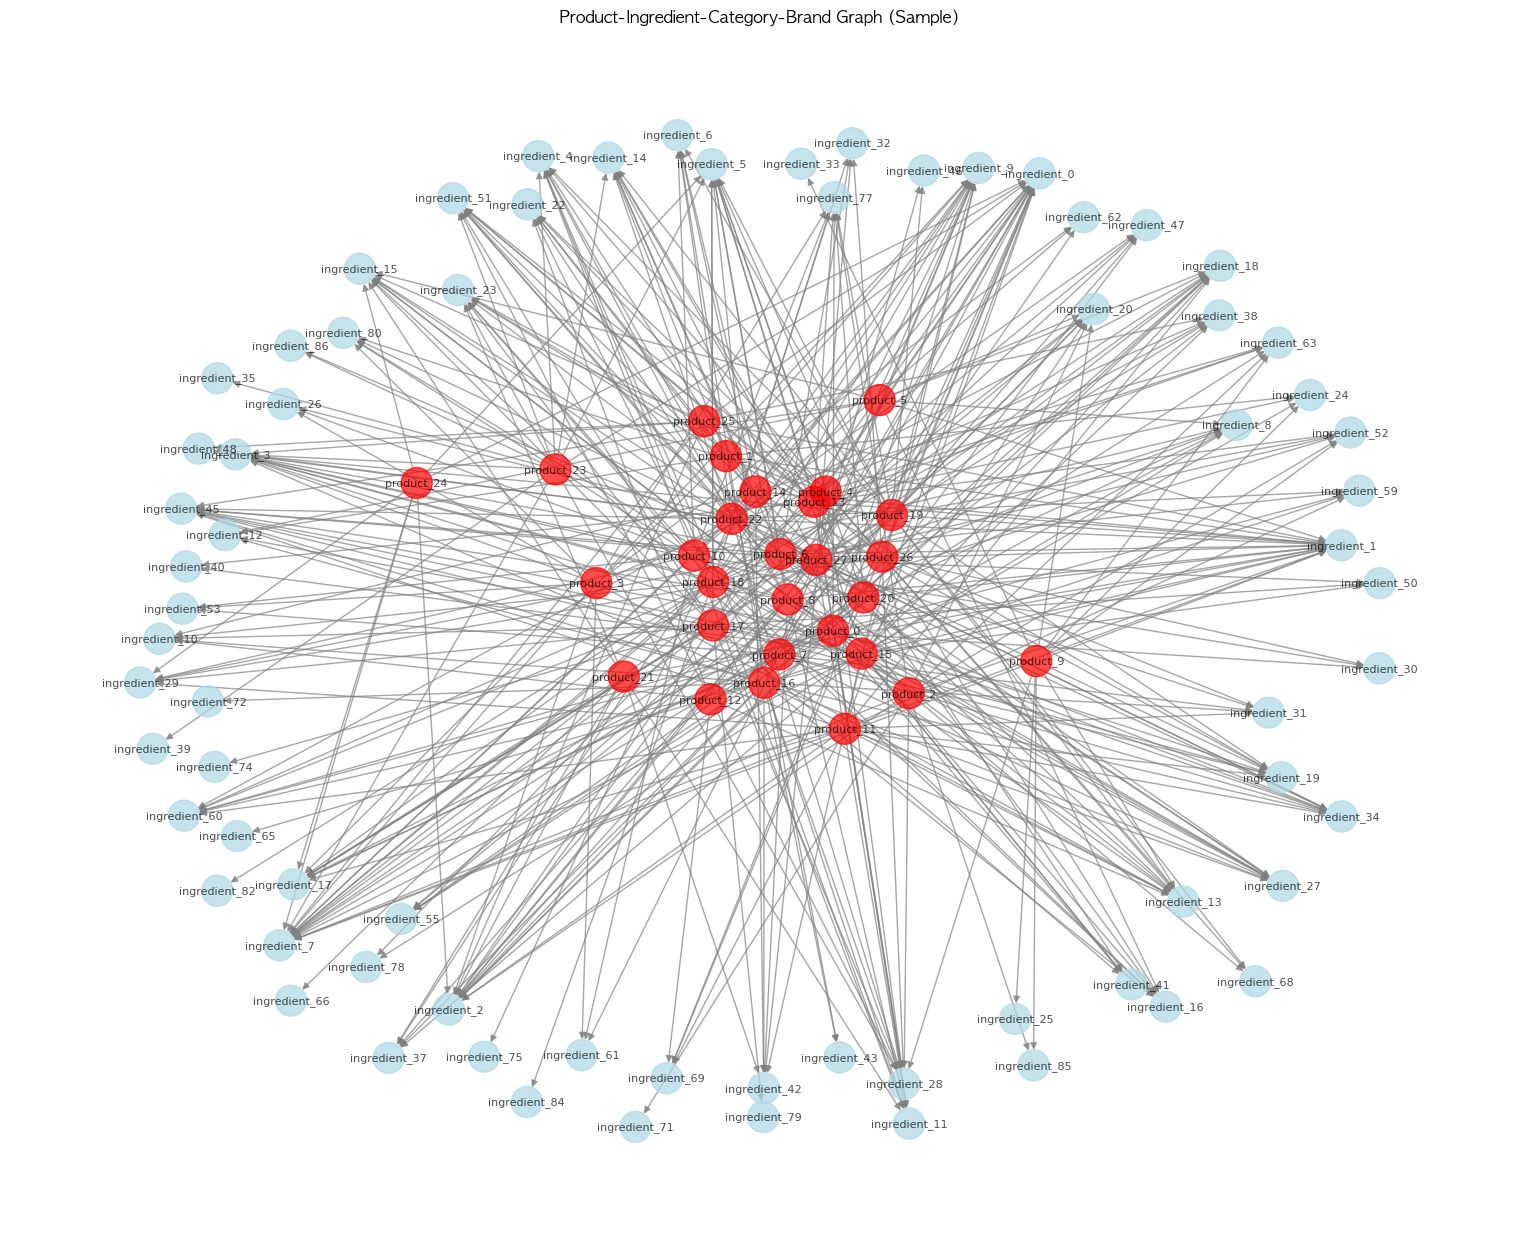

In [40]:
import matplotlib.pyplot as plt
import networkx as nx

# 간단한 시각화 (작은 샘플만)
G_sample = G.subgraph(list(G.nodes())[:100])

plt.figure(figsize=(15, 12))
pos = nx.spring_layout(G_sample, k=1, iterations=50)

# 노드 색상
colors = []
for node in G_sample.nodes():
    if node.startswith('product'):
        colors.append('red')
    elif node.startswith('ingredient'):
        colors.append('lightblue')
    elif node.startswith('category'):
        colors.append('lightgreen')
    else:
        colors.append('yellow')

nx.draw(G_sample, pos, 
        node_color=colors,
        node_size=500,
        with_labels=True,
        font_size=8,
        arrows=True,
        edge_color='gray',
        alpha=0.7)

plt.title('Product-Ingredient-Category-Brand Graph (Sample)')
plt.tight_layout()
plt.savefig('simple_graph.png', dpi=300)
plt.show()

In [43]:
import plotly.graph_objects as go
import networkx as nx
import numpy as np
from collections import defaultdict

def interactive_graph_viz(G, sample_size=200):
    """Plotly를 사용한 인터랙티브 시각화"""
    
    # 노드 타입별 분류
    node_types = defaultdict(list)
    for node in G.nodes():
        node_type = node.split('_')[0]
        node_types[node_type].append(node)
    
    # 샘플링
    sampled_nodes = []
    for ntype, nodes in node_types.items():
        if len(nodes) > sample_size:
            import random
            sampled_nodes.extend(random.sample(nodes, sample_size))
        else:
            sampled_nodes.extend(nodes)
    
    G_sub = G.subgraph(sampled_nodes).copy()
    
    # 레이아웃
    pos = nx.spring_layout(G_sub, k=0.5, iterations=50, seed=42)
    
    # 엣지 트레이스
    edge_traces = []
    edge_types = defaultdict(list)
    
    for u, v, data in G_sub.edges(data=True):
        rel_type = data.get('rel_type', 'unknown')
        edge_types[rel_type].append((u, v))
    
    colors = {
        'contains': 'rgba(255, 107, 107, 0.5)',
        'in_category': 'rgba(149, 225, 211, 0.5)',
        'made_by': 'rgba(255, 230, 109, 0.5)'
    }
    
    for rel_type, edges in edge_types.items():
        x_edges = []
        y_edges = []
        
        for u, v in edges:
            x0, y0 = pos[u]
            x1, y1 = pos[v]
            x_edges.extend([x0, x1, None])
            y_edges.extend([y0, y1, None])
        
        edge_traces.append(go.Scatter(
            x=x_edges, y=y_edges,
            mode='lines',
            line=dict(width=1, color=colors.get(rel_type, 'gray')),
            hoverinfo='none',
            name=rel_type,
            showlegend=True
        ))
    
    # 노드 트레이스 (타입별로)
    color_map = {
        'product': 'red',
        'ingredient': 'lightblue',
        'category': 'lightgreen',
        'brand': 'yellow'
    }
    
    node_traces = []
    for ntype, color in color_map.items():
        nodes = [n for n in G_sub.nodes() if n.startswith(ntype)]
        if not nodes:
            continue
        
        x_nodes = [pos[n][0] for n in nodes]
        y_nodes = [pos[n][1] for n in nodes]
        
        node_traces.append(go.Scatter(
            x=x_nodes, y=y_nodes,
            mode='markers',
            marker=dict(
                size=10,
                color=color,
                line=dict(width=1, color='white')
            ),
            text=[n.split('_')[1] for n in nodes],
            hovertemplate='<b>%{text}</b><br>Type: ' + ntype + '<extra></extra>',
            name=ntype.capitalize(),
            showlegend=True
        ))
    
    # 레이아웃
    fig = go.Figure(data=edge_traces + node_traces)
    fig.update_layout(
        title='Interactive Heterogeneous Graph',
        showlegend=True,
        hovermode='closest',
        width=1200,
        height=800,
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        plot_bgcolor='white'
    )
    
    return fig

# 인터랙티브 시각화
fig_interactive = interactive_graph_viz(G, sample_size=150)
fig_interactive.write_html('graph_interactive.html')
fig_interactive.show()

In [41]:
import dgl
import torch
import pandas as pd

# 1. 데이터 및 매핑 정보 불러오기
edge_ing = pd.read_csv('product_ingredient_edges.csv')
edge_cat = pd.read_csv('product_category_edges.csv')
edge_brd = pd.read_csv('product_brand_edges.csv')
# skintype_edges = pd.read_csv('skintype_product_edges.csv') # 있다면 추가

# 2. DGL 이기종 그래프(Heterograph) 생성
# (src_type, edge_type, dst_type): (source_indices, destination_indices)
graph_data = {
    # Product와 Ingredient 사이의 양방향 관계 (R-GCN은 보통 양방향을 선호함)
    ('product', 'contains', 'ingredient'): (
        torch.tensor(edge_ing['product_id'].values), 
        torch.tensor(edge_ing['ingredient_id'].values)
    ),
    ('ingredient', 'contained_in', 'product'): (
        torch.tensor(edge_ing['ingredient_id'].values), 
        torch.tensor(edge_ing['product_id'].values)
    ),
    
    # Product와 Category 사이의 관계
    ('product', 'in_category', 'category'): (
        torch.tensor(edge_cat['product_id'].values), 
        torch.tensor(edge_cat['category_id'].values)
    ),
    ('category', 'has_product', 'product'): (
        torch.tensor(edge_cat['category_id'].values), 
        torch.tensor(edge_cat['product_id'].values)
    ),
    
    # Product와 Brand 사이의 관계
    ('product', 'made_by', 'brand'): (
        torch.tensor(edge_brd['product_id'].values), 
        torch.tensor(edge_brd['brand_id'].values)
    ),
    ('brand', 'makes', 'product'): (
        torch.tensor(edge_brd['brand_id'].values), 
        torch.tensor(edge_brd['product_id'].values)
    )
}

# 그래프 객체 생성
g = dgl.heterograph(graph_data)

print(g)

ImportError: Cannot load Graphbolt C++ library

## 그래프 시각화 코드

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.patches import FancyBboxPatch
import numpy as np

def visualize_heterograph(g, sample_size=50, figsize=(20, 15)):
    """
    DGL 이기종 그래프를 시각화하는 함수
    
    Parameters:
    - g: DGL heterograph
    - sample_size: 각 노드 타입별로 샘플링할 노드 수
    - figsize: 그림 크기
    """
    
    # NetworkX 그래프로 변환 (시각화용)
    nx_g = nx.DiGraph()
    
    # 노드 타입별 색상 정의
    node_colors = {
        'product': '#FF6B6B',
        'ingredient': '#4ECDC4',
        'category': '#95E1D3',
        'brand': '#FFE66D'
    }
    
    # 엣지 타입별 색상 및 스타일
    edge_styles = {
        'contains': {'color': '#FF6B6B', 'style': 'solid', 'alpha': 0.6},
        'contained_in': {'color': '#4ECDC4', 'style': 'dashed', 'alpha': 0.3},
        'in_category': {'color': '#95E1D3', 'style': 'solid', 'alpha': 0.6},
        'has_product': {'color': '#95E1D3', 'style': 'dashed', 'alpha': 0.3},
        'made_by': {'color': '#FFE66D', 'style': 'solid', 'alpha': 0.6},
        'makes': {'color': '#FFE66D', 'style': 'dashed', 'alpha': 0.3}
    }
    
    # 각 노드 타입별로 샘플링
    sampled_nodes = {}
    for ntype in g.ntypes:
        num_nodes = g.num_nodes(ntype)
        if num_nodes > sample_size:
            sampled_nodes[ntype] = np.random.choice(num_nodes, sample_size, replace=False)
        else:
            sampled_nodes[ntype] = np.arange(num_nodes)
    
    # 노드 추가
    node_labels = {}
    node_color_list = []
    pos_dict = {}
    
    # 각 노드 타입을 다른 위치에 배치
    ntype_positions = {
        'product': (0, 0),
        'ingredient': (-2, 1),
        'category': (2, 1),
        'brand': (0, 2)
    }
    
    for ntype in g.ntypes:
        base_x, base_y = ntype_positions.get(ntype, (0, 0))
        nodes = sampled_nodes[ntype]
        
        for i, node_id in enumerate(nodes):
            node_name = f"{ntype}_{node_id}"
            nx_g.add_node(node_name, node_type=ntype)
            
            # 원형으로 배치
            angle = 2 * np.pi * i / len(nodes)
            radius = 1.5
            x = base_x + radius * np.cos(angle)
            y = base_y + radius * np.sin(angle)
            pos_dict[node_name] = (x, y)
            
            node_labels[node_name] = f"{ntype[:3]}\n{node_id}"
            node_color_list.append(node_colors[ntype])
    
    # 엣지 추가 (샘플링된 노드 간의 연결만)
    edge_lists = {etype: [] for etype in edge_styles.keys()}
    
    for etype in g.canonical_etypes:
        src_type, edge_type, dst_type = etype
        src, dst = g.edges(etype=etype)
        
        for s, d in zip(src.numpy(), dst.numpy()):
            if s in sampled_nodes[src_type] and d in sampled_nodes[dst_type]:
                src_name = f"{src_type}_{s}"
                dst_name = f"{dst_type}_{d}"
                nx_g.add_edge(src_name, dst_name, edge_type=edge_type)
                edge_lists[edge_type].append((src_name, dst_name))
    
    # 그래프 그리기
    fig, ax = plt.subplots(figsize=figsize)
    
    # 각 엣지 타입별로 그리기
    for edge_type, edges in edge_lists.items():
        if edges:
            style_info = edge_styles[edge_type]
            nx.draw_networkx_edges(
                nx_g, pos_dict, 
                edgelist=edges,
                edge_color=style_info['color'],
                style=style_info['style'],
                alpha=style_info['alpha'],
                arrows=True,
                arrowsize=10,
                width=1.5,
                ax=ax
            )
    
    # 노드 그리기
    nx.draw_networkx_nodes(
        nx_g, pos_dict,
        node_color=node_color_list,
        node_size=500,
        alpha=0.9,
        ax=ax
    )
    
    # 레이블 그리기
    nx.draw_networkx_labels(
        nx_g, pos_dict,
        labels=node_labels,
        font_size=6,
        font_weight='bold',
        ax=ax
    )
    
    # 범례 추가
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', 
                   markerfacecolor=color, markersize=10, label=ntype)
        for ntype, color in node_colors.items()
    ]
    ax.legend(handles=legend_elements, loc='upper left', fontsize=12)
    
    # 제목
    plt.title('Heterogeneous Graph Visualization\n' + 
              f'Product: {g.num_nodes("product")}, ' +
              f'Ingredient: {g.num_nodes("ingredient")}, ' +
              f'Category: {g.num_nodes("category")}, ' +
              f'Brand: {g.num_nodes("brand")} nodes',
              fontsize=16, fontweight='bold', pad=20)
    
    plt.axis('off')
    plt.tight_layout()
    return fig

# 시각화 실행
fig = visualize_heterograph(g, sample_size=30)
plt.savefig('heterograph_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

# 그래프 통계 출력
print("\n=== Graph Statistics ===")
for ntype in g.ntypes:
    print(f"{ntype}: {g.num_nodes(ntype)} nodes")

print("\n=== Edge Types ===")
for etype in g.canonical_etypes:
    src_type, edge_type, dst_type = etype
    num_edges = g.num_edges(etype)
    print(f"{src_type} --[{edge_type}]--> {dst_type}: {num_edges} edges")

## 모델링

In [ ]:
import dgl
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np

# ---------------------------------------------------------
# 1. 데이터 로드 및 이기종 그래프(Heterograph) 생성 함수
# ---------------------------------------------------------
def create_cosmetic_graph():
    # 저장된 엣지 데이터 로드
    edge_ing = pd.read_csv('product_ingredient_edges.csv')
    edge_cat = pd.read_csv('product_category_edges.csv')
    edge_brd = pd.read_csv('product_brand_edges.csv')
    mapping = pd.read_csv('node_mappings.csv')
    
    # 노드 타입별 최대 인덱스를 확인하여 노드 수 결정
    num_nodes_dict = {
        'product': mapping[mapping['node_type']=='product']['node_id'].max() + 1,
        'ingredient': mapping[mapping['node_type']=='ingredient']['node_id'].max() + 1,
        'category': mapping[mapping['node_type']=='category']['node_id'].max() + 1,
        'brand': mapping[mapping['node_type']=='brand']['node_id'].max() + 1
    }
    
    # 그래프 데이터 구성 (양방향 연결 포함)
    graph_data = {
        ('product', 'contains', 'ingredient'): (torch.tensor(edge_ing['product_id'].values), torch.tensor(edge_ing['ingredient_id'].values)),
        ('ingredient', 'contained_in', 'product'): (torch.tensor(edge_ing['ingredient_id'].values), torch.tensor(edge_ing['product_id'].values)),
        
        ('product', 'in_category', 'category'): (torch.tensor(edge_cat['product_id'].values), torch.tensor(edge_cat['category_id'].values)),
        ('category', 'has_product', 'product'): (torch.tensor(edge_cat['category_id'].values), torch.tensor(edge_cat['product_id'].values)),
        
        ('product', 'made_by', 'brand'): (torch.tensor(edge_brd['product_id'].values), torch.tensor(edge_brd['brand_id'].values)),
        ('brand', 'makes', 'product'): (torch.tensor(edge_brd['brand_id'].values), torch.tensor(edge_brd['product_id'].values))
    }
    
    # DGL 그래프 객체 생성
    g = dgl.heterograph(graph_data, num_nodes_dict=num_nodes_dict)
    return g, num_nodes_dict

# ---------------------------------------------------------
# 2. R-GCN 모델 및 관련 클래스 정의
# ---------------------------------------------------------

# 이기종 그래프용 R-GCN 레이어
class RGCN(nn.Module):
    def __init__(self, in_feats, hid_size, out_size, rel_names):
        super().__init__()
        # 첫 번째 레이어: 관계별 가중치를 사용하여 메시지 패싱
        self.conv1 = dgl.nn.HeteroGraphConv({
            rel: dgl.nn.GraphConv(in_feats, hid_size) for rel in rel_names
        }, aggregate='sum')
        
        # 두 번째 레이어
        self.conv2 = dgl.nn.HeteroGraphConv({
            rel: dgl.nn.GraphConv(hid_size, out_size) for rel in rel_names
        }, aggregate='sum')

    def forward(self, g, inputs):
        h = self.conv1(g, inputs)
        h = {k: F.relu(v) for k, v in h.items()}
        h = self.conv2(g, h)
        return h

# 링크 예측 점수 계산기 (내적 사용)
class ScorePredictor(nn.Module):
    def forward(self, edge_subgraph, x):
        with edge_subgraph.local_scope():
            edge_subgraph.ndata['h'] = x
            # 모든 관계 타입에 대해 점수 계산
            for etype in edge_subgraph.canonical_etypes:
                edge_subgraph.apply_edges(dgl.function.u_dot_v('h', 'h', 'score'), etype=etype)
            return edge_subgraph.edata['score']

# 전체 추천 모델 아키텍처
class CosmeticRGCNModel(nn.Module):
    def __init__(self, num_nodes_dict, hid_size, out_size, rel_names):
        super().__init__()
        # 1. 초기 노드 임베딩 (학습 가능한 파라미터)
        self.node_embeds = nn.ParameterDict({
            ntype: nn.Parameter(torch.randn(n, hid_size))
            for ntype, n in num_nodes_dict.items()
        })
        
        # 2. R-GCN 레이어
        self.rgcn = RGCN(hid_size, hid_size, out_size, rel_names)
        
        # 3. 점수 예측기
        self.pred = ScorePredictor()

    def forward(self, g, neg_g, etype):
        # R-GCN을 통해 노드 임베딩 업데이트
        h = self.rgcn(g, self.node_embeds)
        # 실제 엣지(Positive)와 가짜 엣지(Negative) 점수 계산
        pos_score = self.pred(g, h)[etype]
        neg_score = self.pred(neg_g, h)[etype]
        return pos_score, neg_score, h

# ---------------------------------------------------------
# 3. 학습 루프 (Training Loop)
# ---------------------------------------------------------
def train_model():
    # 그래프 및 노드 수 정보 가져오기
    g, num_nodes_dict = create_cosmetic_graph()
    etypes = g.canonical_etypes
    
    # 모델 초기화 (임베딩 차원: 64)
    model = CosmeticRGCNModel(num_nodes_dict, 64, 64, etypes)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    
    # 학습 타겟 관계 설정 (예: 제품이 성분을 포함하고 있는지 예측)
    target_etype = ('product', 'contains', 'ingredient')
    
    print("--- R-GCN 학습 시작 ---")
    for epoch in range(101):
        # 1. 네거티브 샘플링 (랜덤하게 가짜 연결 생성)
        u, v = g.edges(etype=target_etype)
        neg_v = torch.randint(0, g.num_nodes('ingredient'), (len(v),))
        neg_g = dgl.heterograph({target_etype: (u, neg_v)}, num_nodes_dict={ntype: g.num_nodes(ntype) for ntype in g.ntypes})
        
        # 2. 모델 순전파
        pos_score, neg_score, node_embeddings = model(g, neg_g, target_etype)
        
        # 3. 손실 함수 계산 (Max-margin loss 기반)
        # 실제 연결 점수는 높게, 가짜 연결 점수는 낮게 학습
        loss = -torch.mean(F.logsigmoid(pos_score) + F.logsigmoid(-neg_score))
        
        # 4. 역전파 및 최적화
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if epoch % 10 == 0:
            print(f'Epoch {epoch:3d} | Loss: {loss.item():.4f}')
            
    print("--- 학습 완료 ---")
    return model, node_embeddings

# 실행부
if __name__ == "__main__":
    trained_model, final_embeddings = train_model()
    # 이제 final_embeddings['product']를 사용하여 유사도 기반 추천이 가능합니다.

## 유사도 기반 추천

임베딩의 의미: R-GCN을 통해 얻은 final_embeddings['product']는 단순히 이름만 있는 벡터가 아닙니다. 우리가 필터링한 87개의 핵심 성분 정보가 각 차원에 녹아들어 있습니다.

유사도 계산: 두 제품의 벡터 방향이 비슷할수록(코사인 유사도가 1에 가까울수록) "성분 구성이 매우 흡사한 제품"임을 의미합니다.

추천 결과: 예를 들어 'S1' 제품을 넣으면, 비록 브랜드나 카테고리가 다르더라도 성분 배합이 가장 비슷한 다른 제품들을 수학적으로 찾아내어 순위를 매깁니다.

In [ ]:
def recommend_products(product_id_str, embeddings, mapping, top_k=5):
    # 1. 문자열 ID를 정수 인덱스로 변환
    prod_map = mapping[mapping['node_type'] == 'product']
    try:
        target_idx = prod_map[prod_map['original_name'] == product_id_str]['node_id'].values[0]
    except IndexError:
        print(f"Error: {product_id_str} 제품을 찾을 수 없습니다.")
        return
    
    # 2. 모든 제품의 임베딩 추출
    prod_embeds = embeddings['product']
    target_embed = prod_embeds[target_idx].reshape(1, -1)
    
    # 3. 코사인 유사도 계산
    # (A * B) / (|A| * |B|)
    norm = torch.norm(prod_embeds, dim=1, keepdim=True)
    prod_embeds_normalized = prod_embeds / norm
    target_embed_normalized = target_embed / torch.norm(target_embed)
    
    similarities = torch.mm(prod_embeds_normalized, target_embed_normalized.t()).squeeze()
    
    # 4. 유사도가 높은 순으로 정렬 (자기 자신 제외)
    scores, indices = torch.topk(similarities, k=top_k + 1)
    
    print(f"\n['{product_id_str}']와 성분이 유사한 추천 제품 리스트:")
    print("-" * 50)
    for i in range(1, len(indices)): # 0번은 자기 자신
        idx = indices[i].item()
        score = scores[i].item()
        res_name = prod_map[prod_map['node_id'] == idx]['original_name'].values[0]
        print(f"{i}. {res_name} (유사도: {score:.4f})")

# 사용 예시 (학습 완료 후 호출)
mapping_df = pd.read_csv('node_mappings.csv')
recommend_products('S1', final_embeddings, mapping_df)